# Task2 数据读取与数据分析
----
## 数据读取(Pandas)
----

In [11]:
import pandas as pd
train_df = pd.read_csv('../input/train_set.csv', sep='\t', nrows=200000)

> 这里read_csv由三部分构成：
读取的文件路径，这里需要根据改成你本地的路径，可以使用相对路径或绝对路径；
分隔符sep，为每列分割的字符，设置为\t即可；
读取行数nrows，为此次读取文件的函数，是数值类型（由于数据集比较大，建议先设置为100）。
>先设置nrows=100做少量测试，全部数据的话，nrows=200000（CPU会死掉注意）

In [3]:
train_df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


**第一列为新闻的类别，第二列为新闻的字符**

在数据集中标签的对应的关系如下：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}

## 数据分析
需要分析的内容都有哪些？
- 赛题数据中，新闻文本的长度是多少？
- 赛题数据的类别分布是怎么样的，哪些类别比较多？
- 赛题数据中，字符分布是怎么样的？

### 新闻句子长度

在赛题数据中，每行句子的字符使用**空格**进行隔开，所以可以直接统计单词的个数来得到每个句子的长度。统计并如下：

In [4]:
%pylab inline
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
print(train_df['text_len'].describe())

Populating the interactive namespace from numpy and matplotlib
count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


对新闻句子的统计可以得出，本次赛题给定的文本比较长，每个句子平均由907个字符构成，最短的句子长度为2，最长的句子长度为53527。

下图将句子长度绘制了直方图：

Text(0.5, 1.0, 'Histogram of char count')

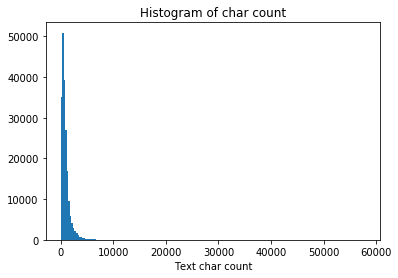

In [5]:
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

从上图可见：句子长度密集集中到0～10000区间，很不均衡

### 新闻类别分布

接下来对数据集的类别进行分布统计，统计每类新闻的样本个数。

Text(0.5, 0, 'category')

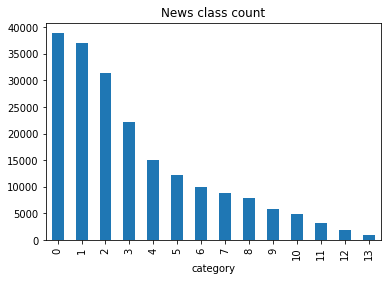

In [6]:
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

- '科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6
- '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13

从统计结果可以看出，赛题的数据集类别分布存在较为不均匀的情况。
在训练集中科技类新闻最多，其次是股票类新闻，最少的新闻是星座新闻。

### 字符分布统计

In [7]:
from collections import Counter
# 将训练集中所有的句子进行拼接
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(" "))

# 排序
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)
print(len(word_count))
# 6869

print(word_count[0])
# ('3750', 7482224)

print(word_count[-1])
# ('5034', 1)


6869
('3750', 7482224)
('3133', 1)


从统计结果中可以看出，在训练集中总共包括2405个字，其中编号3750的字出现的次数最多，编号5034的字出现的次数最少。

这里还可以根据字符在每个句子的出现情况（不同字符在句子中出现的次数），反推出标点符号。

In [8]:
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

print(word_count[0])
# ('3750', 197997)

print(word_count[1])
# ('900', 197653)

print(word_count[2])
# ('648', 191975)

('3750', 197997)
('900', 197653)
('648', 191975)


上面输出可以看出：其中字符3750，字符900和字符648在20w新闻的覆盖率接近99%，很有可能是标点符号。

### 数据分析的结论
>通过上述分析我们可以得出以下结论：
- 赛题中每个新闻包含的字符个数平均为1000个，还有一些新闻字符较长；
- 赛题中新闻类别分布不均匀，科技类新闻样本量接近4w，星座类新闻样本量不到1k；
- 赛题总共包括7000-8000个字符；

>通过数据分析，我们还可以得出以下结论：
- 每个新闻平均字符个数较多，可能需要截断；
- 由于类别不均衡，会严重影响模型的精度；

## 本章小结
本章对赛题数据进行读取，并新闻句子长度、类别和字符进行了可视化分析。

## 本章作业
### 1. 假设字符3750，字符900和字符648是句子的标点符号，请分析赛题每篇新闻平均由多少个句子构成？
#### 1.1 一般做法

In [13]:
%pylab inline
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split('3750')) + len(x.split('900')) + len(x.split('648')))
print(train_df['text_len'].describe())

Populating the interactive namespace from numpy and matplotlib
count    200000.000000
mean         82.802370
std          86.955448
min           3.000000
25%          31.000000
50%          59.000000
75%         105.000000
max        3462.000000
Name: text_len, dtype: float64


上面做法：会有重复计数的情况（不采用）

#### 1.2 正则做法（参考群友）

In [12]:
import re
train_df['text_len'] = train_df['text'].apply(lambda x: len(re.split('3750|900|648',x)))
print(train_df['text_len'].describe())

count    200000.000000
mean         80.802370
std          86.955448
min           1.000000
25%          29.000000
50%          57.000000
75%         103.000000
max        3460.000000
Name: text_len, dtype: float64


由输出结果可以看出：赛题每篇新闻平均由80个句子构成

### 2. 统计每类新闻中出现次数最多的字符

#### 2.1 先按传统做法，完成作业

In [14]:
labels = train_df['label']
texts = train_df['text']

dict = {}
for i in range(len(labels)):
    if labels[i] in dict:
        dict[labels[i]] = dict[labels[i]] + ' ' + texts[i]
    else:
        dict[labels[i]] = texts[i]

for key,val in dict.items():
    word_count = Counter(val.split(" "))
    word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)
    print("key:{},count:{}".format(key,word_count[0]))

KeyboardInterrupt: 

#### 2.2 聚合做法再试一遍（参考圈友）

In [16]:
grouped = train_df.groupby('label')
def statistics_top_char(x):
    all_lines = ' '.join(list(x))
    word_count = Counter(all_lines.split(" "))
    word_count = sorted(word_count.items(),key = lambda d:int(d[1]),reverse =True)
    return word_count[0]
top_char = grouped['text'].apply(statistics_top_char)
print(top_char)

label
0     (3750, 1267331)
1     (3750, 1200686)
2     (3750, 1458331)
3      (3750, 774668)
4      (3750, 360839)
5      (3750, 715740)
6      (3750, 469540)
7      (3750, 428638)
8      (3750, 242367)
9      (3750, 178783)
10     (3750, 180259)
11      (3750, 83834)
12      (3750, 87412)
13      (3750, 33796)
Name: text, dtype: object
